In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import statistics

In [2]:
df = pd.read_excel(r'/home/ashwin/Git/general-physics-lab/frank_hertz_exp.xlsx')
print(df)

    VG2K  CURRENT
0      0     0.00
1      1     0.00
2      2     0.00
3      3     0.00
4      4     0.00
..   ...      ...
88    88    10.43
89    89    11.30
90    90    11.95
91    91    12.33
92    92    12.34

[93 rows x 2 columns]


In [3]:
df = pd.read_excel(r'/home/ashwin/Git/general-physics-lab/frank_hertz_2.xlsx')
print(df)

    VG2K  CURRENT
0      0     0.00
1      1     0.00
2      2     0.00
3      3     0.00
4      4     0.00
..   ...      ...
86    86     9.35
87    87    10.25
88    88    11.25
89    89    12.18
90    90    12.87

[91 rows x 2 columns]


In [4]:
VG2K=df['VG2K'].to_numpy()
current=df['CURRENT'].to_numpy()

del_VG2k=0.01 # least count uncertinity in VG2K
del_current=0.01 # least count uncertinity in current.


/home/ashwin/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/ashwin/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


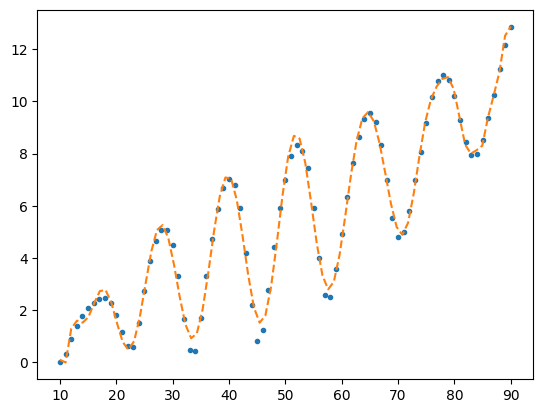

In [5]:



x=VG2K[10:]
y=current[10:]
deg=80

result=np.polyfit(x,y,deg)


p = np.poly1d(result)

xp = np.linspace(10, 90, 80)
plt.plot(x, y, '.', xp, p(xp),'--')

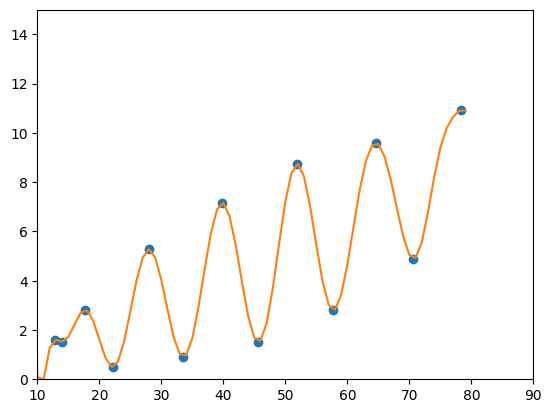

In [6]:

crit = p.deriv().r
r_crit = crit[crit.imag==0].real
test = p.deriv(2)(r_crit) 


# compute local minima 
# excluding range boundaries
x_min = r_crit
x_min=x_min[::-1]
x_min=sorted(x_min[:-1])

y_min = p(x_min)
plt.plot( x_min, y_min, 'o' )

xc = np.arange(0, 80, 1)
yc = p(xc)
plt.plot( xc, yc)
plt.xlim([10,90])
plt.ylim([0,15])

plt.show()

In [7]:
print(x_min)

[10.430412511512898, 12.927540380462625, 14.010319357718187, 17.68381976117765, 22.153174686244775, 27.994931288603212, 33.54237645348072, 39.81032532777336, 45.63546616708539, 51.90739123671405, 57.74175344055731, 64.57279991076246, 70.66721659215575, 78.34274355697522]


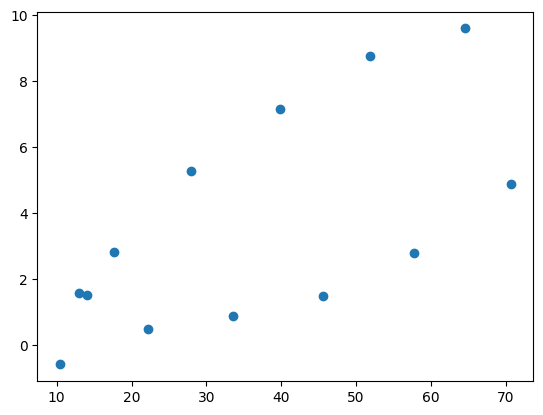

In [8]:
plt.plot( x_min[:-1], y_min[:-1], 'o' )


In [9]:
#x_min=[19.5,25.0,31.1,36.8,42.8,48.0,54.3,59.8,66.2,71.9,78.6,84.5]
x_min=[17.68356249,22.15313569, 27.99507157, 33.5425128, 39.81026745, 51.90723061, 45.63529731, 57.74180001, 64.57314336, 70.66740684
,78.42865456]

In [10]:
diff=[]
for i in range(1,len(x_min)-2):
    diff.append(abs(x_min[i]-x_min[i+2]))
print(diff)

[11.389377109999998, 11.815195879999997, 18.364717810000002, 5.825029860000001, 5.8345693999999995, 18.937846050000005, 12.92560683, 13.855511199999995]


In [11]:
statistics.stdev(diff)

4.9049040112572095

In [12]:
statistics.pstdev(diff)

4.588117581284418

In [13]:
statistics.variance(diff)

24.058083359647068

In [14]:
statistics.mean(diff)

12.3684817675

In [15]:
print(diff)

[11.389377109999998, 11.815195879999997, 18.364717810000002, 5.825029860000001, 5.8345693999999995, 18.937846050000005, 12.92560683, 13.855511199999995]


In [16]:
print(abs(statistics.mean(diff)-11.83)/11.83*100)

4.55183235418428


In [17]:
help(statistics)

Help on module statistics:

NAME
    statistics - Basic statistics module.

MODULE REFERENCE
    https://docs.python.org/3.10/library/statistics.html
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module provides functions for calculating statistics of data, including
    averages, variance, and standard deviation.
    
    Calculating averages
    --------------------
    
    ==================  ==================================================
    Function            Description
    ==================  ==================================================
    mean                Arithmetic mean (average) of data.
    fmean               Fast, floating point arithmetic mean.
    geometric_me

In [18]:
import matplotlib

In [19]:
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    an implicit,  MATLAB-like, way of plotting.  It also opens figures on your
    screen, and acts as the figure GUI manager.
    
    pyplot is mainly intended for interactive plots and simple cases of
    programmatic plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The explicit (object-oriented) API is recommended for complex plots, though
    pyplot is still usually used to create the figure and often the axes in the
    figure. See `.pyplot.figure`, `.pyplot.subplots`, and
    `.pyplot.subplot_mosaic` to create figures, and
    :doc:`Axes API <../axes_api>` for the plotting methods on an axes::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.

In [20]:
print(df)

    VG2K  CURRENT
0      0     0.00
1      1     0.00
2      2     0.00
3      3     0.00
4      4     0.00
..   ...      ...
86    86     9.35
87    87    10.25
88    88    11.25
89    89    12.18
90    90    12.87

[91 rows x 2 columns]


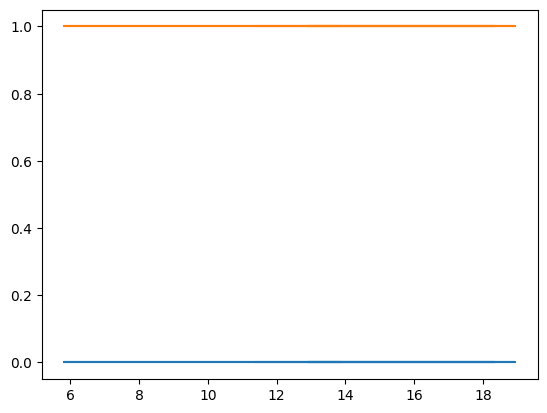

In [23]:
plt.plot(diff,np.zeros(len(diff)))
plt.plot(diff,np.ones(len(diff)))


(array([0.07626127, 0.07626127, 0.07626127, 0.07626127]),
 array([ 5.82502986,  9.10323391, 12.38143796, 15.659642  , 18.93784605]),
 <BarContainer object of 4 artists>)

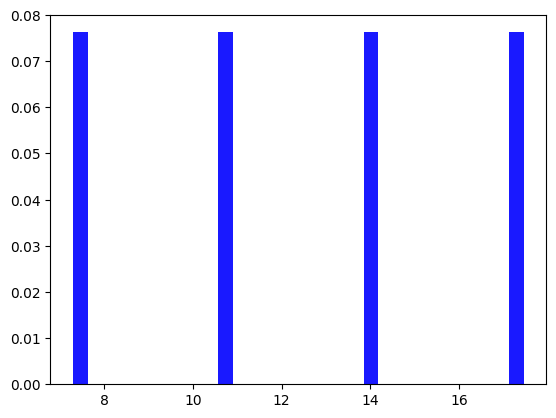

In [27]:
plt.hist(diff,bins='auto', color='b', alpha=0.9, rwidth=0.1,density=True)

The mean is 979.8 and the standard deviation is 73.10. The lower bound is 900 and the upper bound is 1100.

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
mu = statistics.mean(diff)
sigma = statistics.stdev(diff)
x1 = statistics.mean(diff)-statistics.stdev(diff)
x2 = statistics.mean(diff)+statistics.stdev(diff)
# calculate the z-transform
z1 = ( x1 - mu ) / sigma
z2 = ( x2 - mu ) / sigma

In [75]:
x = np.arange(z1+statistics.mean(diff), z2+statistics.mean(diff), 0.001) # range of x in spec
x_all = np.arange(-10+z1, 10, 0.001) # entire range of x, both in and out of spec
# mean = 0, stddev = 1, since Z-transform was calculated
y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

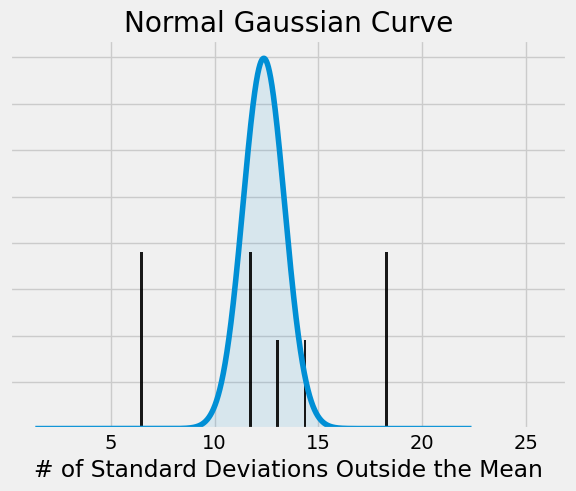

In [88]:
# build the plot
fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')
ax.plot(x_all+mu,y2)

ax.fill_between(x+mu,y,0, alpha=0.7, color='k')
ax.fill_between(x_all+mu,y2,0, alpha=0.1)
#ax.set_xlim([-4,4])
ax.set_xlabel('# of Standard Deviations Outside the Mean')
ax.set_yticklabels([])
ax.set_title('Normal Gaussian Curve')
ax.hist(diff, color='k', alpha=0.9, rwidth=0.1,density=True)
plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

In [43]:
z2

7.463577756242791

In [58]:
x

array([ 7.46357776,  7.46457776,  7.46557776, ..., 17.27057776,
       17.27157776, 17.27257776])

In [56]:
z1 = statistics.mean(diff)-statistics.stdev(diff)
z2 = statistics.mean(diff)+statistics.stdev(diff)

In [55]:
z2

7.463577756242791

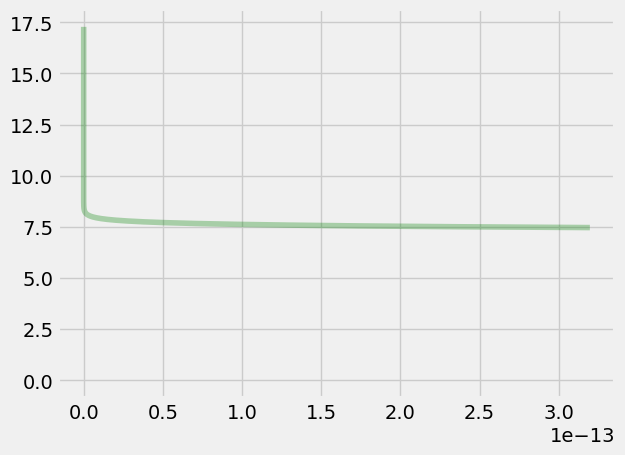

In [62]:
plt.plot(y,x,0, alpha=0.3, color='g')


In [81]:
diff

[11.389377109999998,
 11.815195879999997,
 18.364717810000002,
 5.825029860000001,
 5.8345693999999995,
 18.937846050000005,
 12.92560683,
 13.855511199999995]